In [1]:
#import sys
#sys.path
#sys.path.append("/usr/local/lib/python3.7/site-packages")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from Bio import SeqIO
%matplotlib inline

# Pseudomonas

In [2]:
presp = pd.read_csv('../data/pseudo/responses-pseudo.csv')
presp.rename(columns = {'OriginalID':'id', 'LabID': 'strain'}, inplace = True)
raw = SeqIO.parse('../data/pseudo/concatenated.fasta', 'fasta')
pseq = [(record.id, record.seq._data) for record in raw]
pseq_df = pd.DataFrame(data = pseq, columns = ['id', 'sequence'])
pseudo = pd.merge(pseq_df, presp, on = 'id')
pseudo

,id,sequence,strain,carb,toby
0,TA151,ATGAGTGATCTGCCAAGTCCGAAGAAACACAAGACCTCGAACTGGT...,210.0,True,False
1,IC1,ATGAGTGATCTGCCAAGTCCGAAGAAACACAAGACCTCGAACTGGT...,55.0,False,False
2,A237,ATGAGTGATCTGCCAAGTCCGAAGAAACACAAGACCTCGAACTGGT...,14.0,True,False
3,5920,ATGAGTGATCTGCCAAGTCCGAAGAAACACAAGACCTCGAACTGGT...,NaN,NaN,NaN
4,LiA96,ATGAGTGATCTGCCAAGTCCGAAGAAACACAAGACCTCGAACTGGT...,175.0,False,False
...,...,...,...,...,...
117,JD318,----------------------------------------------...,360.0,False,False
118,Jp238,----------------------------------------------...,126.0,False,False
119,Jp1303,----------------------------------------------...,134.0,False,False
120,JD304,----------------------------------------------...,351.0,False,False


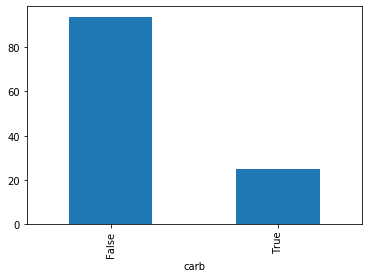

In [3]:
# carb - imbalanced responses
pseudo.groupby('carb').size().plot.bar()
plt.show()

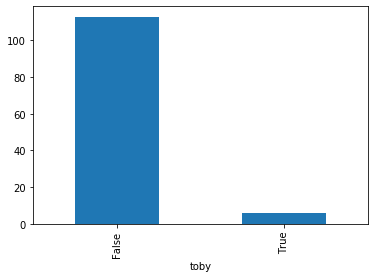

In [4]:
# toby
pseudo.groupby('toby').size().plot.bar()
plt.show()

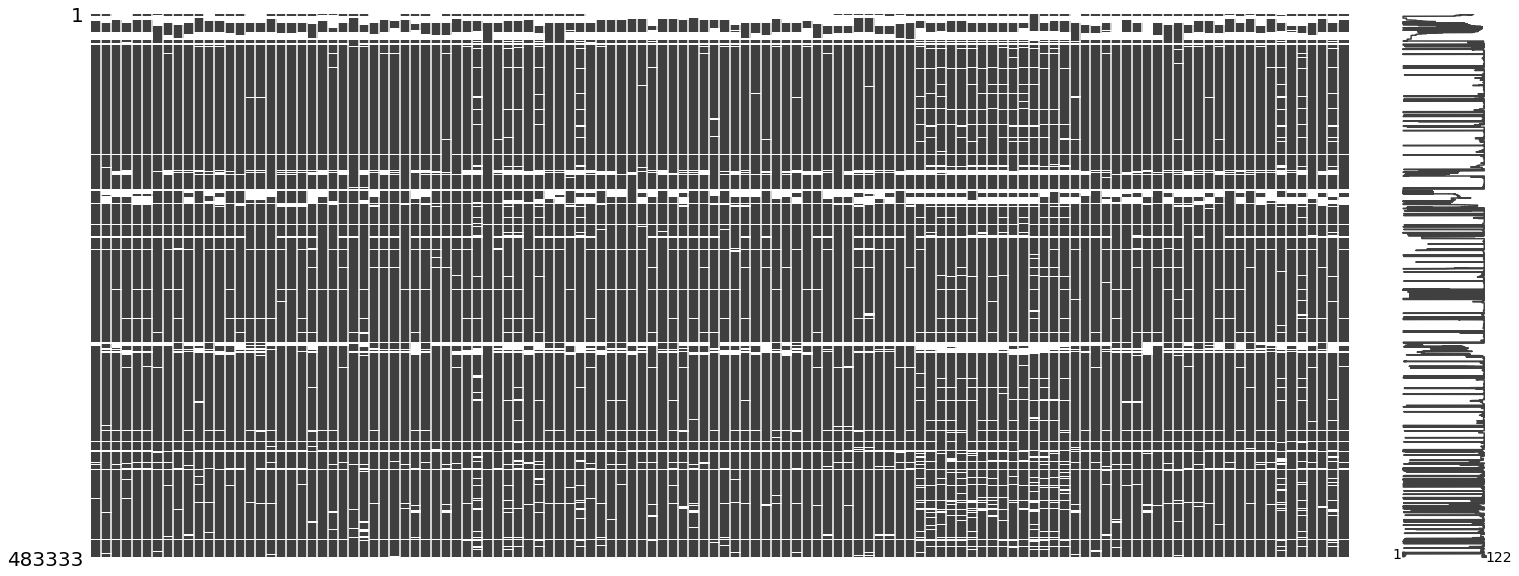

In [5]:
# missingness
import missingno as msno

def explode(data):
    seq_dict = dict()
    for i in range(len(vis[0])):
        for j in range(len(vis[1])):
            if i == j:
                seq_dict[vis[0][i]] = list(vis[1][j])
    return seq_dict

vis = pd.DataFrame(data = pseq)
vis_df = pd.DataFrame(explode(vis)).replace('-', np.NaN)
msno.matrix(vis_df)

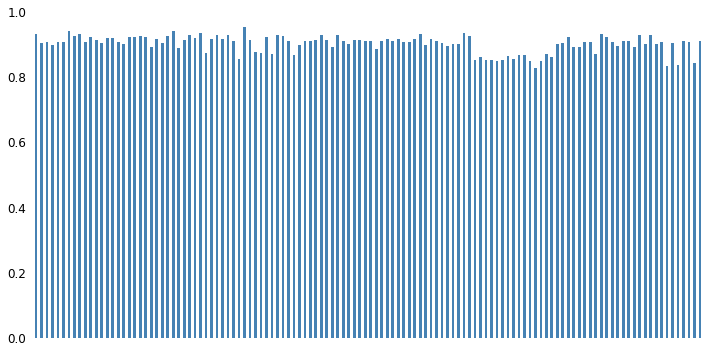

In [6]:
msno.bar(vis_df, figsize=(12, 6), fontsize=12, color='steelblue')

# Staph

In [7]:
sresp = pd.read_csv('../data/staph/responses-staph.csv')
sresp.rename(columns = {'ids': 'id', 'resp': 'response'}, inplace = True)
raw = SeqIO.parse('../data/staph/core_gene_alignment-narsa.aln', 'fasta')
sseq = [(record.id, record.seq._data.upper()) for record in raw]
sseq_df = pd.DataFrame(data = sseq, columns = ['id', 'sequence'])
staph = pd.merge(sseq_df, sresp, on = 'id')
staph

,id,sequence,response
0,NRS001,ATGAACATTTATGATGAATATAGAAGTTATTTAATAGAAGAACTGG...,False
1,NRS002,----------------------------------------------...,False
2,NRS003,ATGAACATTTATGATGAATATAGAAGTTATTTAATAGAAGAACTGG...,False
3,NRS021,ATGAAAATTTATGATGAATATAGAAGTTATGTAATAGAAGAACTGG...,False
4,NRS022,ATGAACATTTATGATGAATATAGAAGTTATGTAATAGAAGAACTGG...,False
...,...,...,...
120,NRS272,ATGAAAATTTATGATGAATATAGAAGTTATGTAATAGAAGAACTGG...,False
121,NRS275,ATGAAAATTTATGATGAATATAGAAGTTATGTAATAGAAGAACTGG...,False
122,NRS383,ATGAACATTTATGATGAATATAGAAGTTATGTAATAGAAGAACTGG...,False
123,NRS386,ATGAAAATTTATGATGAATATAGAAGTTATGTAATAGAAGAACTGG...,True


In [ ]:
staph.groupby('response').size().plot.bar()
plt.show()

In [ ]:
vis = pd.DataFrame(data = sseq)
vis_df = pd.DataFrame(explode(vis)).replace('-', np.NaN)
msno.matrix(vis_df)

In [ ]:
msno.bar(vis_df, figsize=(12, 6), fontsize=12, color='steelblue')